In [4]:
import torch
from transformers import BartForConditionalGeneration, BartTokenizer

model = BartForConditionalGeneration.from_pretrained(r'F:\model_results\bart_50\final\final_model')
tokenizer = BartTokenizer.from_pretrained(r'F:\model_results\bart_50\final\final_tokenizer')



def evaluate_model(texts, model, tokenizer):
    results = []
    for text in texts:
        inputs = tokenizer(text, return_tensors='pt', truncation=True, max_length=512)
        with torch.no_grad():
            outputs = model.generate(
                **inputs,
                max_length=512,  
                num_beams=5,    
                early_stopping=True,
                pad_token_id=tokenizer.eos_token_id)
            
        generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
        print(generated_text)
        results.append(generated_text)
    return results

texts = ["I feel anxious all the time, especially in social settings. How can I manage this better?",
         "Lately, I’ve been feeling sad and unmotivated. Is there a way to overcome this?",
         "What are some strategies to avoid burnout in a high-stress job?",
         "What can I do to handle arguments and disagreements more calmly?",
         "What are some quick ways to relax when I’m feeling extremely stressed?"]
evaluation_results_bart = evaluate_model(texts, model, tokenizer)


It's great that you recognize the need to manage your anxiety in social settings. One technique that can be helpful is deep breathing exercises. Take slow, deep breaths in through your nose and out through your mouth. You can also try progressive muscle relaxation, where you tense and then relax each muscle group in your body one at a time. It's important to also make sure you are getting enough sleep and eating a healthy diet. If you continue to struggle with anxiety, you may benefit from cognitive behavioral therapy, which can help you identify and challenge negative thought patterns that contribute to your anxiety.
It's important to recognize that depression is a treatable condition, and there are many effective treatments available. Therapy, medication, and lifestyle changes can all be effective treatments for depression.
Burnout is a common experience, but it's important to find ways to manage it effectively. Here are some strategies to help you cope with burnout:

1. Practice sel

In [1]:
from transformers import BartTokenizer, BartForConditionalGeneration
import torch
import math

# Load your model and tokenizer
model = BartForConditionalGeneration.from_pretrained(r'F:\model_results\bart_50\final\final_model')
tokenizer = BartTokenizer.from_pretrained(r'F:\model_results\bart_50\final\final_tokenizer')

def calculate_perplexity(model, tokenizer, text):
    inputs = tokenizer(text, return_tensors="pt")
    outputs = model(**inputs, labels=inputs["input_ids"])
    loss = outputs.loss
    perplexity = torch.exp(loss).item()
    return perplexity

# Example usage
text_sample = "I constantly worry about things I can’t control. How can I let go of this feeling?"
perplexity_score = calculate_perplexity(model, tokenizer, text_sample)
print("Perplexity:", perplexity_score)


c:\Users\diviit\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Perplexity: 3.7250659465789795


In [11]:
import time

# Sample text batch
texts = ["I feel anxious all the time, especially in social settings. How can I manage this better?",
         "Lately, I’ve been feeling sad and unmotivated. Is there a way to overcome this?",
         "What are some strategies to avoid burnout in a high-stress job?",
         "What can I do to handle arguments and disagreements more calmly?",
         "What are some quick ways to relax when I’m feeling extremely stressed?"]
# Measure time for batch inference
start_time = time.time()
for text in texts:
    inputs = tokenizer(text, return_tensors="pt")
    model.generate(**inputs)
end_time = time.time()

avg_latency = (end_time - start_time) / len(texts)
print("Average Latency (seconds):", avg_latency)


Average Latency (seconds): 1.3176603317260742


["It's great that you recognize the need to manage your anxiety in social settings. One technique that can be helpful is deep breathing exercises. Take slow, deep breaths in through your nose and out through your mouth. You can also try progressive muscle relaxation, where you tense and then relax each muscle group in your body one at a time. It's important to also make sure you are getting enough sleep and eating a healthy diet. If you continue to struggle with anxiety, you may benefit from cognitive behavioral therapy, which can help you identify and challenge negative thought patterns that contribute to your anxiety.",
 "It's important to recognize that depression is a treatable condition, and there are many effective treatments available. Therapy, medication, and lifestyle changes can all be effective treatments for depression.",
 "Burnout is a common experience, but it's important to find ways to manage it effectively. Here are some strategies to help you cope with burnout:\n\n1. 

In [9]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(responses):
    sentiment_scores = {}
    
    for idx, text in enumerate(responses):
        sentiment_scores[idx] = analyzer.polarity_scores(text)
    
    return sentiment_scores

# Sample list of responses
sample_responses = evaluation_results_bart
sentiment = analyze_sentiment(sample_responses)
print("Sentiment Analysis Scores:")
for idx, score in sentiment.items():
    print(f"Response {idx+1}: {score}")


Sentiment Analysis Scores:
Response 1: {'neg': 0.104, 'neu': 0.687, 'pos': 0.208, 'compound': 0.926}
Response 2: {'neg': 0.188, 'neu': 0.609, 'pos': 0.203, 'compound': -0.1027}
Response 3: {'neg': 0.033, 'neu': 0.631, 'pos': 0.336, 'compound': 0.9883}
Response 4: {'neg': 0.166, 'neu': 0.583, 'pos': 0.251, 'compound': 0.5702}
Response 5: {'neg': 0.119, 'neu': 0.64, 'pos': 0.241, 'compound': 0.6908}


In [12]:
from transformers import BartTokenizer

# Initialize the tokenizer

# List of responses
responses = evaluation_results_bart
# Function to calculate token count and word count
def calculate_token_and_word_count(responses):
    data = []
    for response in responses:
        tokens = tokenizer.encode(response)
        word_count = len(response.split())
        data.append({
            'response': response,
            'token_count': len(tokens),
            'word_count': word_count
        })
    return data

# Calculate token and word count for each response
response_data = calculate_token_and_word_count(responses)

# Print the results
for i, res_data in enumerate(response_data):
    print(f"Response {i+1}:")
    print(f"  Word Count: {res_data['word_count']}")
    print(f"  Token Count: {res_data['token_count']}")
    print("\n")


Response 1:
  Word Count: 105
  Token Count: 119


Response 2:
  Word Count: 29
  Token Count: 38


Response 3:
  Word Count: 82
  Token Count: 109


Response 4:
  Word Count: 50
  Token Count: 60


Response 5:
  Word Count: 36
  Token Count: 44




In [17]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
import numpy as np
from collections import Counter

# Ensure you have the necessary NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab')

def calculate_metrics_for_responses(responses):
    results = []
    
    for response in responses:
        # Tokenize the response into words and sentences
        words = word_tokenize(response)
        sentences = sent_tokenize(response)
        
        # Metric 1: Word Count
        word_count = len(words)
        
        # Metric 2: Token Count (same as word count here, can extend if needed)
        token_count = len(words)
        
        # Metric 3: Average Sentence Length (Average number of words per sentence)
        avg_sentence_length = word_count / len(sentences) if len(sentences) > 0 else 0
        
        # Metric 4: Lexical Diversity (Type-Token Ratio)
        word_types = len(set(words))  # Unique words
        ttr = word_types / word_count if word_count > 0 else 0
        
        # Append the metrics for this response
        results.append({
            "response": response,
            "word_count": word_count,
            "token_count": token_count,
            "avg_sentence_length": avg_sentence_length,
            "lexical_diversity": ttr
        })
    
    return results

# Example usage with a list of responses
responses = evaluation_results_bart

metrics = calculate_metrics_for_responses(responses)

# Output the results
for i, metric in enumerate(metrics):
    print(f"Response {i + 1}:")
    print(f"  Word Count: {metric['word_count']}")
    print(f"  Token Count: {metric['token_count']}")
    print(f"  Average Sentence Length: {metric['avg_sentence_length']}")
    print(f"  Lexical Diversity (TTR): {metric['lexical_diversity']}")
    print()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\diviit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\diviit\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


Response 1:
  Word Count: 117
  Token Count: 117
  Average Sentence Length: 19.5
  Lexical Diversity (TTR): 0.6752136752136753

Response 2:
  Word Count: 35
  Token Count: 35
  Average Sentence Length: 17.5
  Lexical Diversity (TTR): 0.8

Response 3:
  Word Count: 96
  Token Count: 96
  Average Sentence Length: 16.0
  Lexical Diversity (TTR): 0.7083333333333334

Response 4:
  Word Count: 57
  Token Count: 57
  Average Sentence Length: 19.0
  Lexical Diversity (TTR): 0.7894736842105263

Response 5:
  Word Count: 42
  Token Count: 42
  Average Sentence Length: 21.0
  Lexical Diversity (TTR): 0.8333333333333334



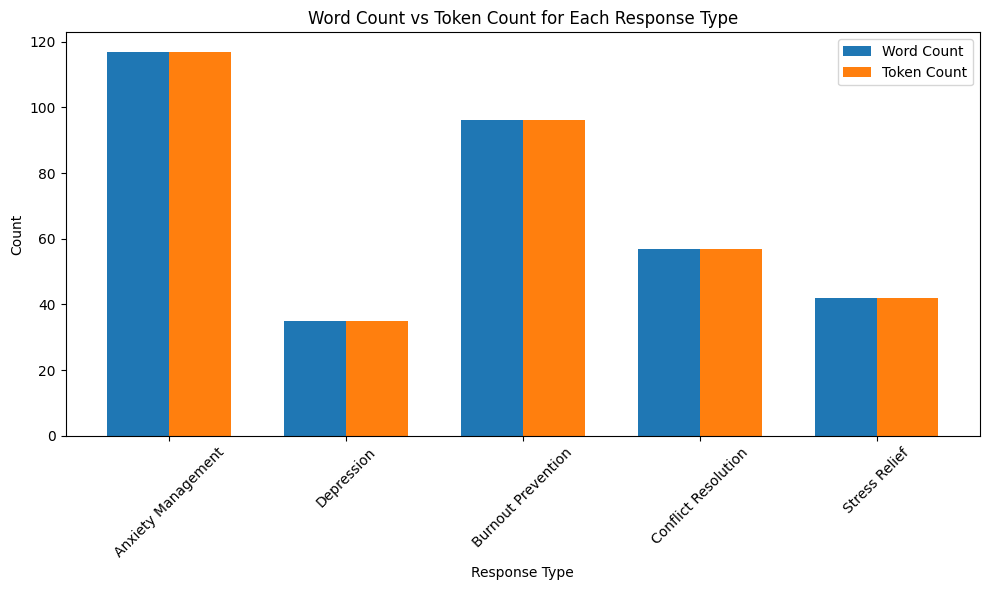

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Data
response_types = ['Anxiety Management', 'Depression', 'Burnout Prevention', 'Conflict Resolution', 'Stress Relief']
word_counts = [117, 35, 96, 57, 42]
token_counts = [117, 35, 96, 57, 42]

x = np.arange(len(response_types))  # X-axis positions

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35

# Plot bars
bars1 = ax.bar(x - bar_width / 2, word_counts, bar_width, label='Word Count')
bars2 = ax.bar(x + bar_width / 2, token_counts, bar_width, label='Token Count')

# Labels and titles
ax.set_xlabel('Response Type')
ax.set_ylabel('Count')
ax.set_title('Word Count vs Token Count for Each Response Type')
ax.set_xticks(x)
ax.set_xticklabels(response_types, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()
